**This notebook will provie split logic for datasets. We'll use training, validation and test sets here. An assumption is made that we will use stochastic gradient descent thus observations will be randomized and saved accordingly.**

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pyprojroot import here
import matplotlib.pyplot as plt


In [43]:
#importing encoded unscaled data

unscaled_processed_df = pd.read_csv(here('data/processed/encoded_unscaled_df.csv'))
print(unscaled_processed_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air temperature      10000 non-null  float64
 1   Process temperature  10000 non-null  float64
 2   Rotational speed     10000 non-null  int64  
 3   Torque               10000 non-null  float64
 4   Tool wear            10000 non-null  int64  
 5   quality_variation    10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB
None


In [44]:
np.random.seed(7)
indices = unscaled_processed_df.index.array
print(indices)
#Shuffling because we'll use SGD for these training sets
shuffled_indices = np.random.permutation(indices)
unscaled_processed_df = unscaled_processed_df.reindex(labels=shuffled_indices,axis=0)
print(unscaled_processed_df.head(3))

<NumpyExtensionArray>
[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
 ...
 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999]
Length: 10000, dtype: int64
      Air temperature  Process temperature  Rotational speed  Torque  \
1977            298.1                307.7              1633    30.7   
3880            302.5                311.6              1595    29.5   
52              298.8                309.0              1497    43.8   

      Tool wear  quality_variation  Machine failure  TWF  HDF  PWF  OSF  RNF  
1977        145                  1                0    0    0    0    0    0  
3880         35                  0                0    0    0    0    0    0  
52          147                  2                0    0    0    0    0    0  


In [45]:
X = unscaled_processed_df.loc[:,['quality_variation','Air temperature','Process temperature','Rotational speed','Torque','Tool wear']]
Y = unscaled_processed_df.loc[:,['Machine failure','TWF','HDF','PWF','OSF','RNF']]
print(X.shape)
print(Y.shape)


(10000, 6)
(10000, 6)


### Cheatsheet: two-step split params
_First split_: `test_size1 = test`  
_Second split (on remainder)_: `test_size2 = val / (1 - test)`

| Final split (train/val/test) | `test_size1` (for test) | `test_size2` (for val) |
|---|---:|---:|
| 60/20/20 | 0.2000 | 0.2500 |
| 70/15/15 | 0.1500 | 0.1765 |
| 75/15/10 | 0.1000 | 0.1667 |
| 80/10/10 | 0.1000 | 0.1111 |
| 80/15/5  | 0.0500 | 0.1579 |
| 65/20/15 | 0.1500 | 0.2353 |
| 50/25/25 | 0.2500 | 0.3333 |


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1000,random_state=1234)

X_train, X_val, Y_train, Y_val =  train_test_split(X_train,Y_train, test_size=0.1667, random_state=1234)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(f'y values are,{Y_train.shape},{Y_val.shape},{Y_test.shape}')

(7499, 6)
(1501, 6)
(1000, 6)
y values are,(7499, 6),(1501, 6),(1000, 6)


In [47]:
#Saving Training, Validation, Test splits
X_train.to_csv(here('data/processed/X_train.csv'), index=False)
Y_train.to_csv(here('data/processed/Y_train.csv'), index=False)

X_val.to_csv(here('data/processed/X_val.csv'), index=False)
Y_val.to_csv(here('data/processed/Y_val.csv'), index=False)

X_test.to_csv(here('data/processed/X_test.csv'), index=False)
Y_test.to_csv(here('data/processed/Y_test.csv'), index=False)


In [48]:
X_train_scaled = (X_train - X_train.mean())/X_train.std()

print(X_train_scaled.mean())
print('-----------------')
print(X_train_scaled.std())


quality_variation      6.348362e-17
Air temperature        1.910999e-14
Process temperature   -6.395856e-15
Rotational speed       1.444963e-16
Torque                -2.558295e-16
Tool wear             -8.527650e-17
dtype: float64
-----------------
quality_variation      1.0
Air temperature        1.0
Process temperature    1.0
Rotational speed       1.0
Torque                 1.0
Tool wear              1.0
dtype: float64


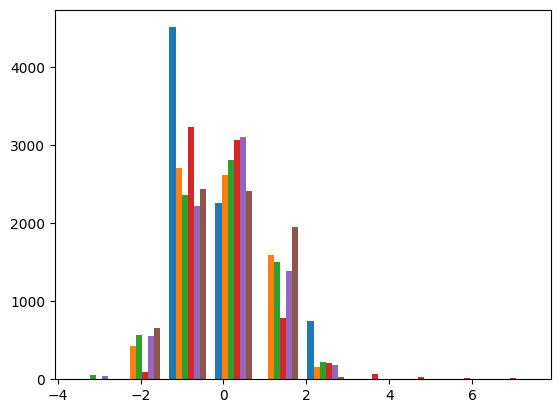

In [52]:
#view of scaled training data
plt.hist(X_train_scaled);

In [38]:
X_val_scaled = (X_val - X_train.mean())/X_train.std()

print(X_val_scaled.mean())
print('-----------------')
print(X_val_scaled.std())

quality_variation      0.030263
Air temperature        0.004922
Process temperature   -0.013612
Rotational speed       0.014342
Torque                -0.029442
Tool wear             -0.018977
dtype: float64
-----------------
quality_variation      1.029930
Air temperature        0.983962
Process temperature    0.985786
Rotational speed       0.948499
Torque                 0.984961
Tool wear              0.980861
dtype: float64


In [39]:
X_test_scaled = (X_test - X_train.mean())/X_train.std()

print(X_test_scaled.mean())
print('-----------------')
print(X_test_scaled.std())

quality_variation     -0.012052
Air temperature        0.002965
Process temperature    0.021864
Rotational speed       0.026041
Torque                -0.008778
Tool wear              0.016079
dtype: float64
-----------------
quality_variation      0.984686
Air temperature        0.999627
Process temperature    1.018053
Rotational speed       1.000754
Torque                 1.020848
Tool wear              1.023803
dtype: float64


In [40]:
#Saving Scaled Training, Validation, Test splits
X_train_scaled.to_csv(here('data/processed/X_train_scaled.csv'), index=False)
Y_train.to_csv(here('data/processed/Y_train.csv'), index=False)

X_val_scaled.to_csv(here('data/processed/X_val_scaled.csv'), index=False)
Y_val.to_csv(here('data/processed/Y_val.csv'), index=False)

X_test_scaled.to_csv(here('data/processed/X_test_scaled.csv'), index=False)
Y_test.to_csv(here('data/processed/Y_test.csv'), index=False)

Size Before Preprocessing: One dataset, (10000, 12)
| Split         | X Shape   | Y Shape   |
|---------------|-----------|-----------|
| Training      | (7499, 6) | (7499, 6) |
| Validation    | (1501, 6) | (1501, 6) |
| Test          | (1000, 6) | (1000, 6) |